In [1583]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


In [1584]:
# Lấy địa chỉ thư mục chứa dữ liệu đã được reformatted
current_directory = os.getcwd()
folder_path = os.path.join(current_directory,'../../data/reformatted_data')

# Tạo df
df = pd.read_csv(f'{folder_path}/non_pre_processed_data.csv')
df['ar3'] = df['ar3'].apply(lambda x: round(x,2))
 


In [1585]:
df.columns

Index(['student_id', 'gender', 'age', 'gpa1', 'gpa2', 'gpa3', 'gpa4', 'ar1',
       'ar2', 'ar3', 'ar4', 'drop_out'],
      dtype='object')

### Biến phân loại:
+ 'student_id'
+ 'gender'
+ 'drop_out' (thôi học)
### Biến số:
+ 'age'
+ 'gpa1', 'gpa2', 'gpa3', 'gpa4' (điểm trung bình học kỳ 1, 2, 3, 4)
+ 'ar1', 'ar2', 'ar3', 'ar4' (tỉ lệ vắng học học kỳ 1, 2, 3, 4)


# Kiểm tra dữ liệu thiếu

In [1586]:
df.isnull().sum()

student_id    0
gender        0
age           0
gpa1          0
gpa2          0
gpa3          0
gpa4          0
ar1           0
ar2           0
ar3           0
ar4           0
drop_out      0
dtype: int64

In [1587]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  325 non-null    int64  
 1   gender      325 non-null    int64  
 2   age         325 non-null    int64  
 3   gpa1        325 non-null    float64
 4   gpa2        325 non-null    float64
 5   gpa3        325 non-null    float64
 6   gpa4        325 non-null    float64
 7   ar1         325 non-null    float64
 8   ar2         325 non-null    float64
 9   ar3         325 non-null    float64
 10  ar4         325 non-null    float64
 11  drop_out    325 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 30.6 KB


## Kiểm tra dữ liệu trùng

In [1588]:
duplicated_id_pairs = df.duplicated(subset=['student_id'], keep=False)
duplicated_id_pairs[duplicated_id_pairs==True]
if duplicated_id_pairs.all():
    print('Có cặp id bị trùng')
else:
    print('Không có student_id bị trùng')

Không có student_id bị trùng


## Thống kê mô tả

In [1589]:
df.iloc[:,2:-1].describe()

,age,gpa1,gpa2,gpa3,gpa4,ar1,ar2,ar3,ar4
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,21.030769,6.468000,7.123692,6.560923,6.868923,9.584308,6.840154,8.103077,6.706462
std,1.143544,2.170586,1.926447,1.751237,1.785898,9.457773,13.181684,8.624856,11.989175
min,20.000000,0.800000,0.200000,0.600000,0.900000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.600000,6.100000,5.300000,5.800000,2.900000,0.000000,1.700000,0.000000
50%,21.000000,6.600000,7.400000,6.900000,7.100000,8.200000,1.700000,6.670000,2.800000
75%,22.000000,8.400000,8.600000,7.700000,8.100000,14.400000,9.700000,12.400000,8.600000
max,26.000000,10.000000,10.000000,9.900000,10.000000,88.000000,80.000000,75.000000,100.000000


## Chuyển đổi kiểu dữ liệu

In [1590]:
df.dtypes

student_id      int64
gender          int64
age             int64
gpa1          float64
gpa2          float64
gpa3          float64
gpa4          float64
ar1           float64
ar2           float64
ar3           float64
ar4           float64
drop_out        int64
dtype: object

In [1591]:
df['student_id'] = df['student_id'].astype(str)
df.dtypes

student_id     object
gender          int64
age             int64
gpa1          float64
gpa2          float64
gpa3          float64
gpa4          float64
ar1           float64
ar2           float64
ar3           float64
ar4           float64
drop_out        int64
dtype: object

## Kiếm tra biến phân loại student_id

In [1592]:
df['student_id'] = df['student_id'].astype(str)
check = df['student_id'].str.isalpha()
check[check]

Series([], Name: student_id, dtype: bool)

## Kiếm tra biến phân loại gender

In [1593]:
check = df['gender'].astype(str).str.isalpha()
check[check]

Series([], Name: gender, dtype: bool)

In [1594]:
df['gender'].unique()

array([1, 0], dtype=int64)

## Kiêm tra biến phân loại age

In [1595]:
check = df['age'].astype(str).str.isalpha()
print(df['age'].dtype)
df['age'] = df['age'].astype('int8')
print("Kiểu dữ liệu sau khi chuyển đổi: ",df['age'].dtype)
check[check]

int64
Kiểu dữ liệu sau khi chuyển đổi:  int8


Series([], Name: age, dtype: bool)

In [1596]:
df['drop_out'].unique()

array([1, 0], dtype=int64)

## Mã hóa biến phân loại student_id bằng phương pháp LabelEncoder

Phương pháp label encoder
+ Chuyển đổi các biến phân loại thành các số nguyên duy nhất.
+ Label Encoder thích hợp cho các biến phân loại không có mối quan hệ thứ bậc giữa các giá trị, nghĩa là không có thứ tự hoặc mức độ quan trọng giữa các giá trị

In [1597]:
le = LabelEncoder()
df['student_id'] = le.fit_transform(df['student_id'])

In [1598]:
df  

,student_id,gender,age,gpa1,gpa2,gpa3,gpa4,ar1,ar2,ar3,ar4,drop_out
0,0,1,23,2.3,0.2,2.5,3.2,34.5,12.0,0.0,53.0,1
1,1,0,23,5.9,7.7,7.7,7.5,0.0,18.0,0.0,19.5,0
2,2,1,23,7.5,4.6,4.5,9.5,0.0,12.3,0.0,7.2,0
3,3,1,23,7.6,7.1,7.3,8.4,5.7,2.2,16.1,8.9,0
4,4,1,23,6.7,7.8,4.7,4.2,0.0,0.0,10.3,8.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
320,320,1,20,8.1,2.7,9.5,6.5,3.2,40.0,2.2,12.1,0
321,321,1,23,7.8,8.0,9.6,6.8,14.5,0.0,11.0,0.0,0
322,322,1,20,10.0,7.3,9.8,9.2,17.0,10.0,3.4,8.5,0
323,323,0,21,7.6,7.2,9.4,5.9,10.5,1.6,10.0,0.0,0


## Chuẩn hóa dữ liệu (z score)

Mục tiêu: Đưa các biến về cùng 1 thang đo

Giữ cho phân phối của chúng có trung bình xấp xỉ 0 và độ lệch chuẩn xấp xỉ 1, (giảm biến động của dữ liệu   )

In [1599]:
# Chuyển đổi các biến về cùng 1 thang đo bằng z score
features = df.iloc[:, 1:].columns
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])
data = df.iloc[:, 3:]
data

,gpa1,gpa2,gpa3,gpa4,ar1,ar2,ar3,ar4,drop_out
0,-1.923180,-3.599565,-2.322464,-2.057553,2.638477,0.392044,-0.940952,3.867232,6.740072
1,-0.262084,0.299617,0.651444,0.353912,-1.014942,0.847923,-0.940952,1.068736,-0.148366
2,0.476181,-1.312045,-1.178653,1.475523,-1.014942,0.414838,-0.940952,0.041229,-0.148366
3,0.522322,-0.012317,0.422682,0.858637,-0.411333,-0.352558,0.928625,0.183242,-0.148366
4,0.107048,0.351606,-1.064272,-1.496747,-1.014942,-0.519714,0.255113,0.124766,-0.148366
...,...,...,...,...,...,...,...,...,...
320,0.753030,-2.299837,1.680874,-0.206894,-0.676074,2.519479,-0.685482,0.450561,-0.148366
321,0.614606,0.455584,1.738064,-0.038652,0.520553,-0.519714,0.336399,-0.560239,-0.148366
322,1.629720,0.091661,1.852445,1.307281,0.785293,0.240085,-0.546134,0.149827,-0.148366
323,0.522322,0.039672,1.623683,-0.543378,0.096968,-0.398146,0.220276,-0.560239,-0.148366


## Giảm chiều dữ liệu. (PCA)

In [1600]:
## Danh sách các features
nb_features = data.shape[1]
features = data.columns
print(nb_features)
print('Các features:', ', '.join(features))

9
Các features: gpa1, gpa2, gpa3, gpa4, ar1, ar2, ar3, ar4, drop_out


In [1601]:
pca = PCA().fit(data)  
## Phương sai trên từng chiều (phương sai đo lường mức độ phân tán của các điểm dữ liệu quanh giá trị trung bình)
print(pca.explained_variance_.flatten())

[3.27522049 1.24986834 0.96434734 0.87709863 0.73995108 0.66958766
 0.51454137 0.46012911 0.27703377]


## Chọn k
k là eig vectors có eig values lớn nhất.

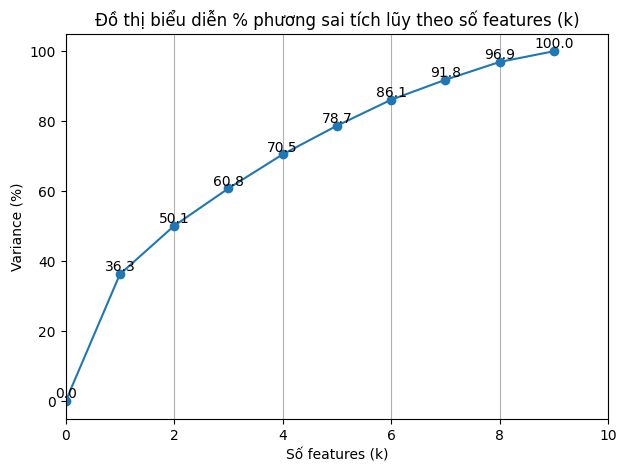

In [1602]:
# Các điểm dữ liệu
points = np.cumsum(pca.explained_variance_ratio_) * 100
points = np.insert(points, 0, 0) # Thêm điểm k = 0, variance = 0
x_i = np.arange(0, nb_features + 1)
y_i = (points[-nb_features-1:])//0.01/100  # Corrected calculation of y_i

plt.figure(figsize = (7, 5))
plt.plot(points, marker = 'o')
plt.xlabel('Số features (k)')
plt.ylabel('Variance (%)')  
plt.title('Đồ thị biểu diễn % phương sai tích lũy theo số features (k)')
plt.xlim([0, nb_features + 1])
plt.grid(axis = 'x')
for i in x_i:
    plt.text(i, y_i[i] + 1, round(y_i[i], 1), ha = 'center', va = 'baseline')
    # tung độ của text cao hơn point 1 đơn vị

plt.show()


In [1603]:
## Kiểm chứng: Tính phương sai tích lũy theo giá trị của k
var = 0.0
for k in range(1, nb_features + 1):
    pca = PCA(k)
    pca.fit(data)

    #Tính tổng phương sai tích lũy
    newVar = pca.explained_variance_ratio_.sum() * 100
    print('   * k = %2d' %k, ': phương sai tích lũy ~ %.1f%%' %newVar,
          '--> tăng ~ %.1f%%' %(newVar - var))
    var = newVar

   * k =  1 : phương sai tích lũy ~ 36.3% --> tăng ~ 36.3%
   * k =  2 : phương sai tích lũy ~ 50.1% --> tăng ~ 13.8%
   * k =  3 : phương sai tích lũy ~ 60.8% --> tăng ~ 10.7%
   * k =  4 : phương sai tích lũy ~ 70.5% --> tăng ~ 9.7%
   * k =  5 : phương sai tích lũy ~ 78.7% --> tăng ~ 8.2%
   * k =  6 : phương sai tích lũy ~ 86.1% --> tăng ~ 7.4%
   * k =  7 : phương sai tích lũy ~ 91.8% --> tăng ~ 5.7%
   * k =  8 : phương sai tích lũy ~ 96.9% --> tăng ~ 5.1%
   * k =  9 : phương sai tích lũy ~ 100.0% --> tăng ~ 3.1%


### Nhận xét: 
Khi tăng từ k=1 đến k=2, phương sai tích lũy tăng khoảng 11.9%, đây là một sự tăng đáng kể.

Tuy nhiên, sau khi tăng từ k=2 đến k=3, mức tăng giảm xuống còn 10.6%, và sau đó giảm dần theo mỗi bước tăng k.

In [1604]:
A = data.values
pca = PCA(n_components = 2)
pca.fit(A)

PCA(n_components=2)

In [1605]:
## Hiển thị kết quả tóm tắt
#  components_: array, shape (n_components, n_features)
#               Các thành phần chính trong không gian features,
#               biểu thị các hướng của phương sai tối đa trong dữ liệu
#  explained_variance_ : array, shape (n_components,)
#               Lượng phương sai được giải thích bởi từng thành phần được chọn.
print('PCA.components:\n', pca.components_)
print('PCA.shape:', pca.components_.shape)
print('PCA.explained variance:', pca.explained_variance_)
print('PCA.explained variance shape:', pca.explained_variance_.shape)

PCA.components:
 [[-0.23326026 -0.25633057 -0.28123751 -0.27072634  0.37318906  0.30551586
   0.34638617  0.39082249  0.47134   ]
 [ 0.30298755 -0.6438715   0.35552693  0.18780099 -0.13162617  0.55162415
  -0.05179078 -0.08350825 -0.02624597]]
PCA.shape: (2, 9)
PCA.explained variance: [3.27522049 1.24986834]
PCA.explained variance shape: (2,)


In [1606]:
## Phép chiếu dữ liệu vào không gian MỚI (tọa độ mới)
P = pca.transform(A)
P.shape

(325, 2)

In [1607]:
PC_name = ['PC 1', 'PC 2']
df_pca = pd.DataFrame(P, columns = PC_name)
df_pca['student_id'] = df['student_id']

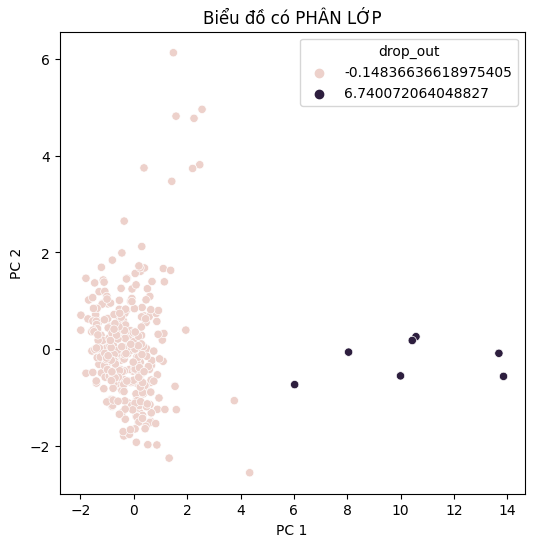

In [1608]:
## Biểu diễn trực quan dữ liệu sau khi áp dụng PCA
df_pca['drop_out'] = df['drop_out']

plt.figure(figsize = (6, 6))
plt.title('Biểu đồ có PHÂN LỚP')
sns.scatterplot(x = PC_name[0], y = PC_name[1], data = df_pca, hue='drop_out')
plt.show()

In [1609]:
# Dữ liệu phân bố thành 2 vùng:
# Vùng 1: dữ liệu tập trùng trong khoảng (4, 6) -> tập trung các điểm dữ liệu sinh viên còn học tiếp
# Vùng 2: dữ liệu phân bố đồ đều trong khoảng (5.5, 15) -> tập trung các điểm dữ liệu là sinh viên thôi học 
# -> Nếu x cao, y thấp -> sinh viên có khả năng thôi học.


In [1610]:
df_pca

,PC 1,PC 2,student_id,drop_out
0,8.048238,-0.059296,0,6.740072
1,-0.392580,0.590454,1,-0.148366
2,-0.474514,1.258738,2,-0.148366
3,-0.407880,0.277876,3,-0.148366
4,0.119077,-1.026254,4,-0.148366
...,...,...,...,...
320,0.383308,3.748264,320,-0.148366
321,-0.875365,0.181601,321,-0.148366
322,-1.112673,1.387608,322,-0.148366
323,-0.739577,0.414810,323,-0.148366


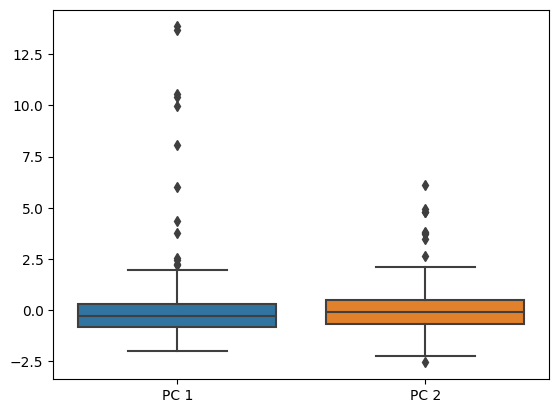

In [1611]:
sns.boxplot(df_pca.iloc[:,[0,1]])
plt.show()

In [1612]:
def calculate_iqr(df, col):
    Q1 = df[f'{col}'].quantile(0.25)
    Q2 = df[f'{col}'].quantile(0.50)
    Q3 = df[f'{col}'].quantile(0.75)
    return ((Q3-Q1),Q1, Q2, Q3) 

In [1613]:
UW = calculate_iqr(df_pca, 'PC 2')[3] + 1.5*calculate_iqr(df_pca, 'PC 2')[0]
outlier = df_pca[df_pca['PC 2'] > UW].sort_values(by='PC 2')
df_pca.drop(index=(outlier.index), inplace = True)
df_pca

,PC 1,PC 2,student_id,drop_out
0,8.048238,-0.059296,0,6.740072
1,-0.392580,0.590454,1,-0.148366
2,-0.474514,1.258738,2,-0.148366
3,-0.407880,0.277876,3,-0.148366
4,0.119077,-1.026254,4,-0.148366
...,...,...,...,...
319,-0.843176,-0.648550,319,-0.148366
321,-0.875365,0.181601,321,-0.148366
322,-1.112673,1.387608,322,-0.148366
323,-0.739577,0.414810,323,-0.148366


In [1614]:
outlier

,PC 1,PC 2,student_id,drop_out
71,-0.359278,2.649003,71,-0.148366
296,1.423994,3.470647,296,-0.148366
255,2.205293,3.736688,255,-0.148366
320,0.383308,3.748264,320,-0.148366
177,2.472025,3.813779,177,-0.148366
234,2.257118,4.772178,234,-0.148366
304,1.583118,4.817643,304,-0.148366
233,2.558039,4.958473,233,-0.148366
273,1.484057,6.128841,273,-0.148366


#### Tính độ lệch của phân phối dữ liệu.
+ Nếu dữ liệu có độ méo lệch bằng 0, đó có nghĩa là dữ liệu hoàn toàn đối xứng. 

+ Nếu độ méo lệch lớn hơn 0, dữ liệu lệch về phía bên trái của trục x (trái đối với phân phối Gaussian)

+ Nếu nhỏ hơn 0, dữ liệu lệch về phía bên phải của trục x.

c:\Program Files\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


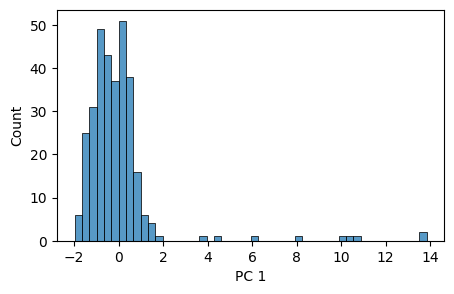

In [1615]:
plt.figure(figsize = (5, 3))
sns.histplot(data = df_pca['PC 1'])
plt.show()

c:\Program Files\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


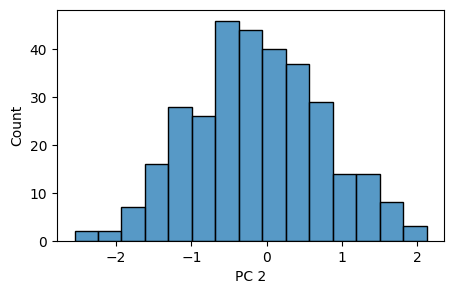

In [1616]:
plt.figure(figsize = (5, 3))
sns.histplot(data = df_pca['PC 2'])
plt.show()

In [1617]:
#  tính độ xiên của tần số

print(df_pca['PC 1'].mean(), df_pca['PC 1'].median())
print(df_pca['PC 2'].mean(), df_pca['PC 2'].median())

print('PC 1',df_pca['PC 1'].skew())
print('PC 2',df_pca['PC 2'].skew())

-0.04432808392800662 -0.3203951701938481
-0.1205554312492714 -0.12776746083595855
PC 1 5.072283694640022
PC 2 0.09167587077637394


In [1618]:
# mean > median
# độ xiên > 0
# Có số lượng nhỏ ở PC 1 và PC 2 có khả năng tiếp tục học 
# 2 biểu đồ lệch dương  

In [1619]:

mask = ~df['student_id'].isin(df_pca['student_id'])
# Loại bỏ các dòng có chỉ mục không nằm trong df_pca
df = df[~mask]
df


,student_id,gender,age,gpa1,gpa2,gpa3,gpa4,ar1,ar2,ar3,ar4,drop_out
0,0,0.294884,1.724698,-1.923180,-3.599565,-2.322464,-2.057553,2.638477,0.392044,-0.940952,3.867232,6.740072
1,1,-3.391165,1.724698,-0.262084,0.299617,0.651444,0.353912,-1.014942,0.847923,-0.940952,1.068736,-0.148366
2,2,0.294884,1.724698,0.476181,-1.312045,-1.178653,1.475523,-1.014942,0.414838,-0.940952,0.041229,-0.148366
3,3,0.294884,1.724698,0.522322,-0.012317,0.422682,0.858637,-0.411333,-0.352558,0.928625,0.183242,-0.148366
4,4,0.294884,1.724698,0.107048,0.351606,-1.064272,-1.496747,-1.014942,-0.519714,0.255113,0.124766,-0.148366
...,...,...,...,...,...,...,...,...,...,...,...,...
319,319,0.294884,-0.902771,0.891455,0.663541,-0.892700,-0.150814,-0.580767,-0.519714,-0.267440,-0.560239,-0.148366
321,321,0.294884,1.724698,0.614606,0.455584,1.738064,-0.038652,0.520553,-0.519714,0.336399,-0.560239,-0.148366
322,322,0.294884,-0.902771,1.629720,0.091661,1.852445,1.307281,0.785293,0.240085,-0.546134,0.149827,-0.148366
323,323,-3.391165,-0.026948,0.522322,0.039672,1.623683,-0.543378,0.096968,-0.398146,0.220276,-0.560239,-0.148366


In [1624]:
df_pca.dtypes

PC 1          float64
PC 2          float64
student_id      int32
drop_out      float64
dtype: object

## Chia tập dữ liệu

In [1620]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(df_pca, df['student_id'], test_size=0.2, stratify=df['drop_out'], random_state=42)

In [1621]:
X_train_pca = X_train_pca.reindex(columns = ['student_id', 'PC 1', 'PC 2', 'drop_out'])
X_test_pca = X_test_pca.reindex(columns = ['student_id', 'PC 1', 'PC 2', 'drop_out'])

In [1622]:
X_train_pca.dtypes

student_id      int32
PC 1          float64
PC 2          float64
drop_out      float64
dtype: object

In [1623]:
X_train_pca.to_csv('../../data/train_test/xtrain_data.csv')
X_test_pca.to_csv('../../data/train_test/xtest_data.csv')
y_test.to_csv('../../data/train_test/ytest_data.csv')
y_train.to_csv('../../data/train_test/ytrain_data.csv')